# An Example-Notebook for the 6x6 French-Flag

In [1]:
%load_ext autoreload
%autoreload 2

## Presets and Project Structure

### Imports

In [2]:
import musepy         # multiscale evolution package
import main as flags  # main routines of examples.evolve.flags 
import helper         # helpers for examples.evolve.flags 

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

### Project Structure
- Possible agent architectures as `mindcraft.Agent`-files can be found in the following folder. You might load them via `mindcraft.Agent.make(<agent_file>)`.

In [6]:
%ls $helper.AGENTS_FOLDER

pretrained/                    sm_ff-embd_flat-pm_rgrn.yml*
sm_attn-embd_qkv-pm_rgrn.yml*  sm_ff-embd_mean-pm_ff.yml*
sm_ff-embd_flat-pm_ff.yml*     sm_ff-embd_mean-pm_rgrn.yml*


- Possible flag or morphogenesis tasks can be found in the following folder. They are in the ARC format.

In [7]:
%ls $helper.TASKS_FOLDER

czech_8x8.json*   ooe_6x6.json*     smiley_9x9.json*
french_6x6.json*  polish_8x8.json*  usa_8x8.json*


## Experiments

### Training
This might take a while, consider running it in parallel from the terminal, see [README](README.md)

In [8]:
# flags.train(task_id="french_6x6.json", agent="sm_ff-embd_mean-pm_ff.yml")

### Display Progress of Training Runs

Accessing Log-File `data/french_6x6/sm_ff-embd_mean-pm_ff/agent.log`
History: 4 runs, 4 of them finished


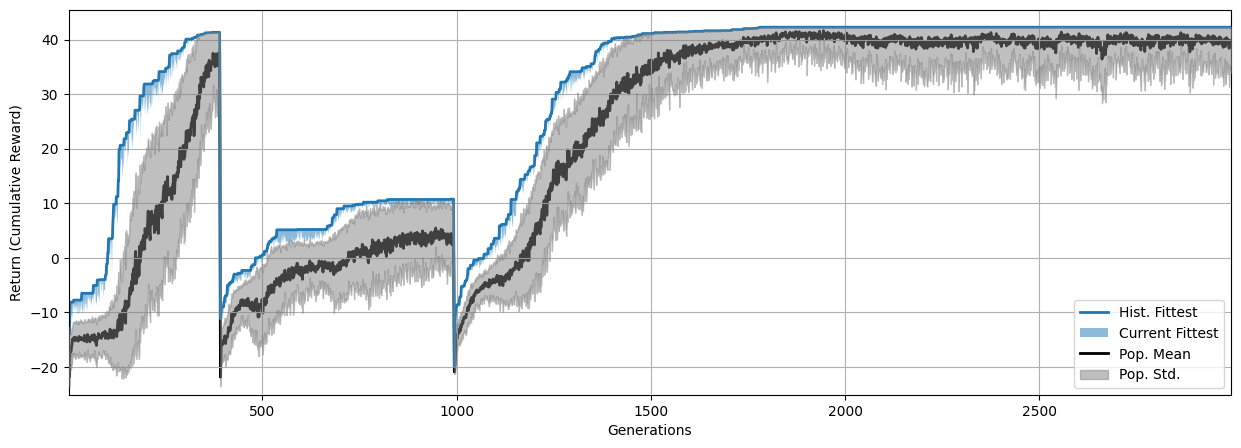

In [100]:
flags.progress(task_id="french_6x6.json", agent="sm_ff-embd_mean-pm_ff.yml")

There can be several successive runs which are concatenated along the `Generations` axis in the log-file.

### Display Evo-Devo History
- We show the NCA's developmental process (from top to bottom) along evolutionary generations (from left to right).
- The resulting `data` dictionary contains all the information that is plotted, and additional fitness data present in the respective checkpoint file (see below)

Checkpointing Task 'french_6x6.json' with Agent 'sm_ff-embd_mean-pm_ff.yml' in 'test'-mode with prefix ``.
Loading checkpoint from 'data/french_6x6/sm_ff-embd_mean-pm_ff/agent-ckpt.h5'
Found 196 checkpoint generations of run -1
Evaluating structural genome 196/196
Evaluating structural reward 196/196
Evaluating states 196/196
Plotting 196 generations of 25 developmental states: 14/14


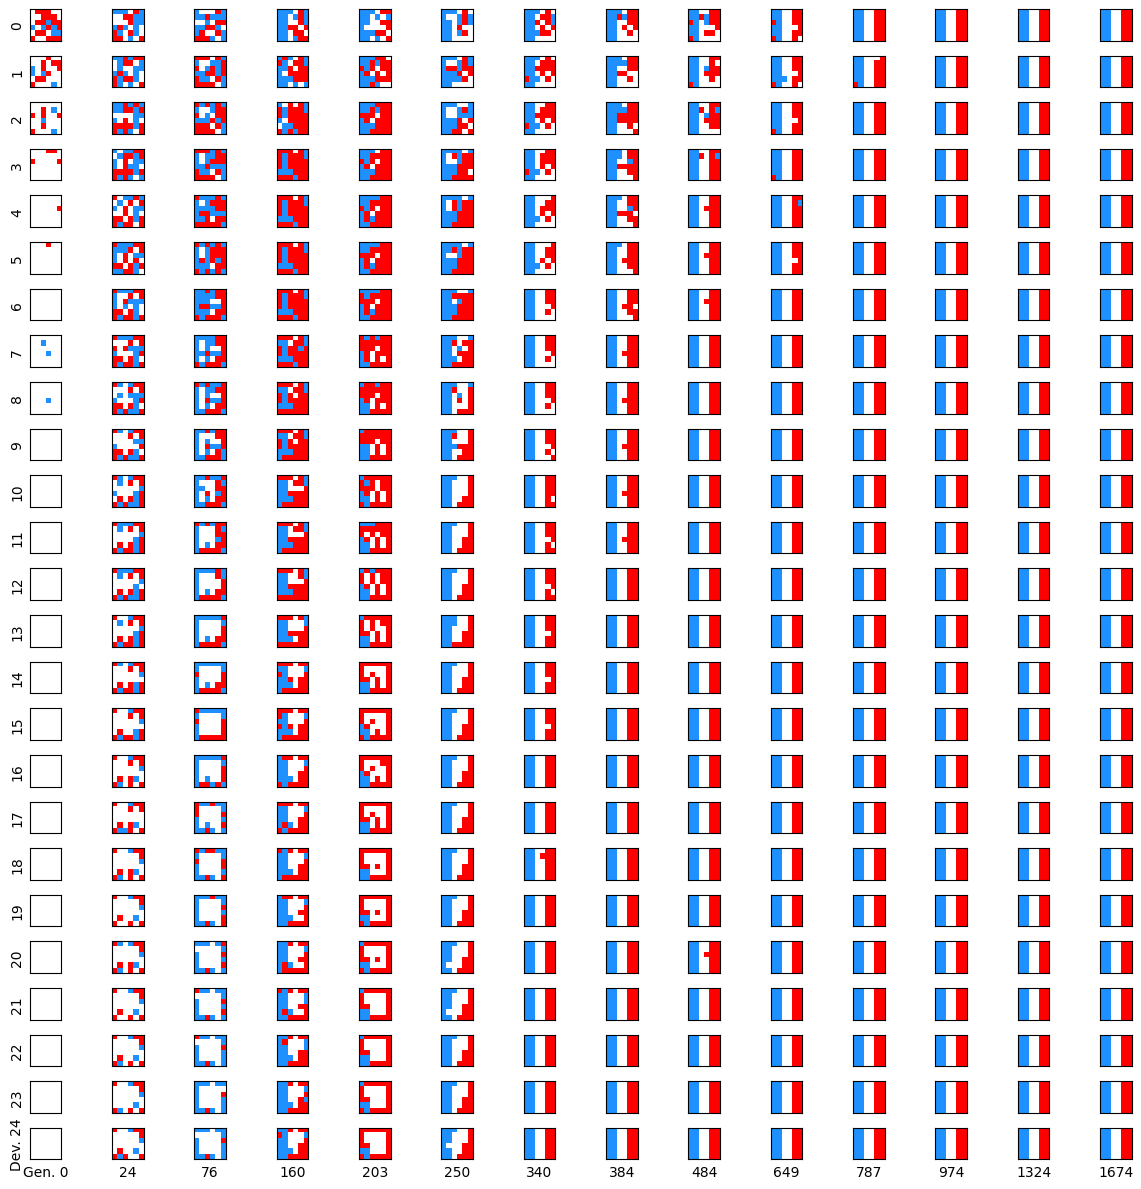

In [13]:
data = flags.checkpoints(task_id="french_6x6.json", agent="sm_ff-embd_mean-pm_ff.yml", show_states="palette")

- We can also plot the cell states in an RBG notation, where R, G, and B channels are given by the relative contributions of cell state #1, #2, and #3 scaled to the interval [-bounds, bounds] -> [0, 1]. This shows, how strong the different cell-states are expressed. Notably, this information is available in the returned `data` dictionary.

Checkpointing Task 'french_6x6.json' with Agent 'sm_ff-embd_mean-pm_ff.yml' in 'test'-mode with prefix ``.
Loading checkpoint from 'data/french_6x6/sm_ff-embd_mean-pm_ff/agent-ckpt.h5'
Found 196 checkpoint generations of run -1
Evaluating structural genome 196/196
Evaluating structural reward 196/196
Evaluating states 196/196
Plotting 196 generations of 25 developmental states: 14/14


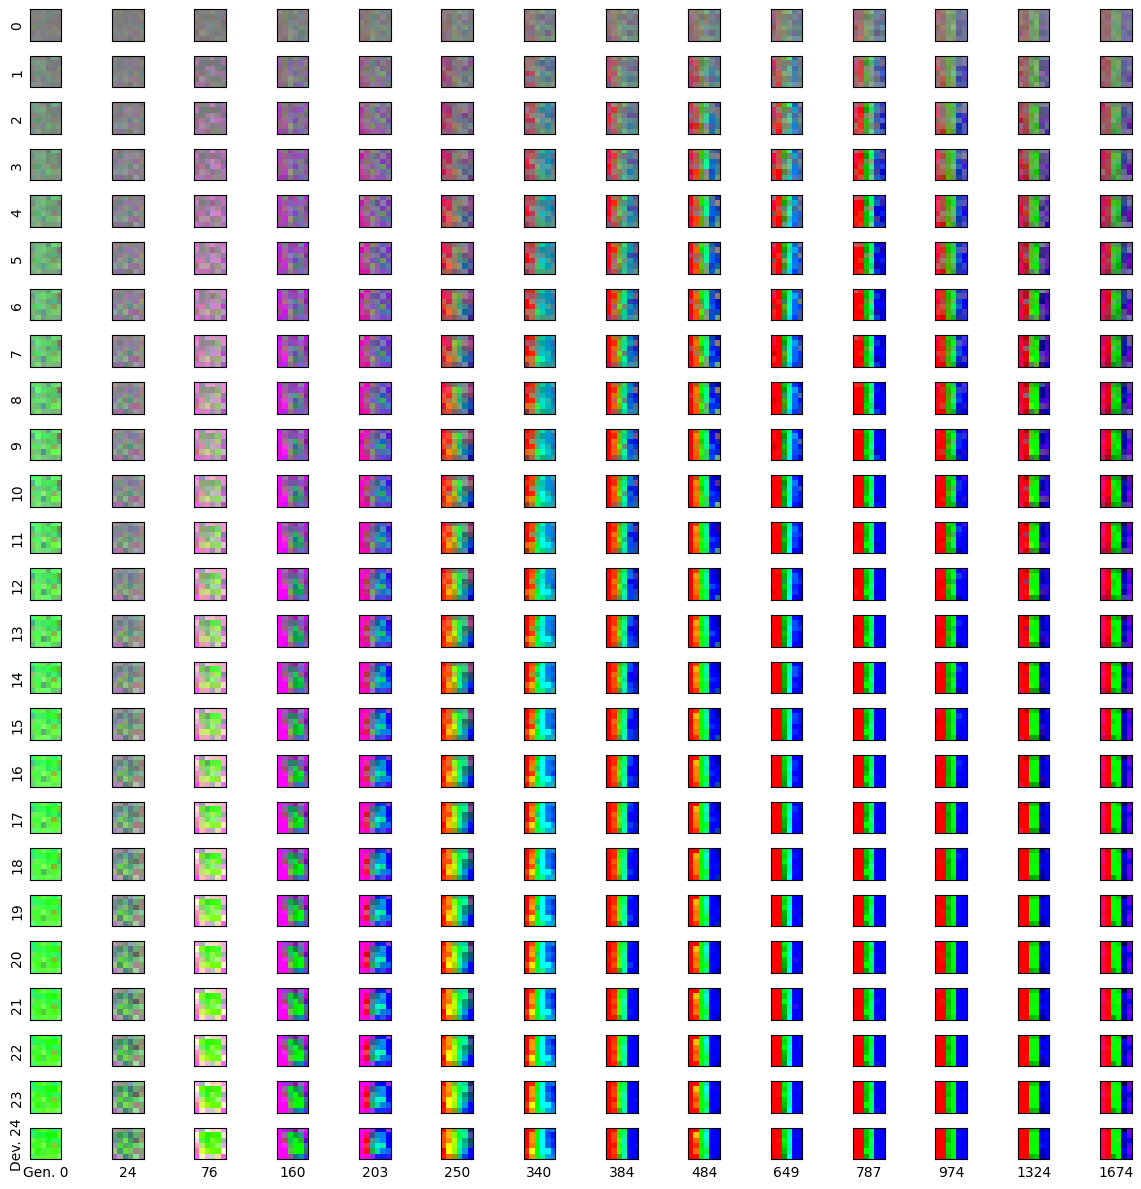

In [14]:
flags.checkpoints(task_id="french_6x6.json", agent="sm_ff-embd_mean-pm_ff.yml", 
                  show_states="rgb",  # use this for RGB notation
                 );

### Testing the NCA

In [161]:
test_data = flags.test(task_id="french_6x6.json", agent="sm_ff-embd_mean-pm_ff.yml", max_steps=25, n_episodes=5,
                       
                       # we can access the parameters of different runs and generations (340 above seems one, where the problem has been solved but not yet "overfitted")
                       checkpoint={"runs": -1, "gens": 100},  # gens are the checkpoint gens 0-196, not the labeled gens above -> checkpoints are iteratively labeled (TODO)
                       
                       # disabled by default if called from the command line; matplotlib updates don't work in jupyter, TODO
                       # -> you might all `python main.py test french_6x6.json sm_ff-embd_mean-pm_ff.yml` from the terminal, or from within a python script
                       disable_render=True
                      );

Testing Task 'french_6x6.json' with Agent 'sm_ff-embd_mean-pm_ff.yml' in 'test'-mode with prefix ``.
Loading world from 'data/french_6x6/sm_ff-embd_mean-pm_ff/world.yml'
Rollout episode 1/5 at 2025.02.25, 11:00:14
step 25/25, total reward: 35.0, episode loss: 0.0, episode rating: 35.0     
Episode 0 finished after 25 time-steps (1 seconds).
Rollout episode 2/5 at 2025.02.25, 11:00:15
step 25/25, total reward: 39.5, episode loss: 0.0, episode rating: 39.5     
Episode 1 finished after 25 time-steps (1 seconds).
Rollout episode 3/5 at 2025.02.25, 11:00:16
step 25/25, total reward: 39.5, episode loss: 0.0, episode rating: 39.5     
Episode 2 finished after 25 time-steps (1 seconds).
Rollout episode 4/5 at 2025.02.25, 11:00:18
step 25/25, total reward: 33.25, episode loss: 0.0, episode rating: 33.25     
Episode 3 finished after 25 time-steps (1 seconds).
Rollout episode 5/5 at 2025.02.25, 11:00:19
step 25/25, total reward: 40.0, episode loss: 0.0, episode rating: 40.0     
Episode 4 finis

The `test_data` can also be accessed

In [162]:
print("num episodes:", len(test_data))

num episodes: 5


In [163]:
print("episodes dictionaries:")
for k, v in test_data[0].items():
    print(f"- {k}: type: {type(v)} shape: {v.shape}")

episodes dictionaries:
- reward: type: <class 'numpy.ndarray'> shape: (25,)
- state: type: <class 'numpy.ndarray'> shape: (25, 6, 6, 4)
- info: type: <class 'numpy.ndarray'> shape: (25,)


- You can change the logged information via the `log_fields` and `log_foos` arguments of the `flags.test` function.
- They default to `helper.WORLD_LOG_FIELDS` and `helper.WORLD_LOG_FOOS`:

In [188]:
helper.WORLD_LOG_FIELDS

['reward', 'state', 'info']

In [189]:
helper.WORLD_LOG_FOOS

{'state': 'self.env.state_array.copy()', 'info': 'self.env.info'}

With the `log_foos`, you can access any property within the `mindcraft.World` object after the `world.env.step(...)` method was called.
- `reward`, `action`, and `observation` are wildcards
- `state` is a non-trivial `log_field`, and copies the `HybridNCA`'s (i.e., the `world.env`) `state_array` at every time-step
- `info` accesses the `world.env`'s `info` dictionary at every time-step.

#### Plot the cumulative reward for the different episodes
- Some individuals might work well (high fitness), some "died"

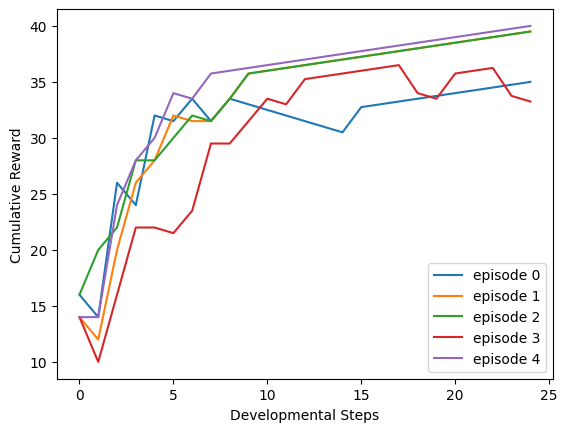

In [184]:
for i, episode in enumerate(test_data):    
    # the NCA's reward is the cumulative reward of the 
    plt.plot(np.cumsum(episode["reward"]), label=f"episode {i}")

plt.xlabel("Developmental Steps")
plt.ylabel("Cumulative Reward")
plt.legend();

#### Plot the parts of the reward by accessing the `info` logs

We can for intsance access the info dictionary:

In [179]:
info_episode_0 = test_data[0]["info"]
info_episdoe_0_timestep_0 = info_episode_0[0]
info_episdoe_0_timestep_0.keys()

dict_keys(['reset', 'individual_reward', 'completion_reward', 'stagnation_cost', 'num_diff_cost'])

Which holds different contributions of the reward, e.g. the complition_reward when the pattern was complete during development

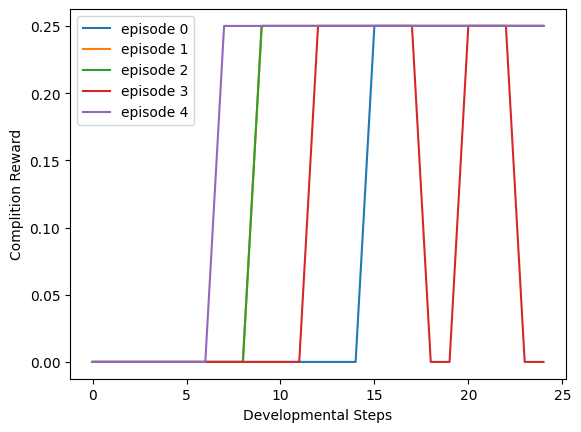

In [183]:
for i, episode in enumerate(test_data):
    info = episode["info"]
    completion_reward = [info_t["completion_reward"] for info_t in info]
    plt.plot(completion_reward, label=f"episode {i}")

plt.xlabel("Developmental Steps")
plt.ylabel("Complition Reward")
plt.legend();

#### Plot Cell-States and Cell-Types across Developmet from `test_data`

cell types-channel shape: (25, 6, 6, 3)
cell-type shape (argmax of types-channel): (25, 6, 6)


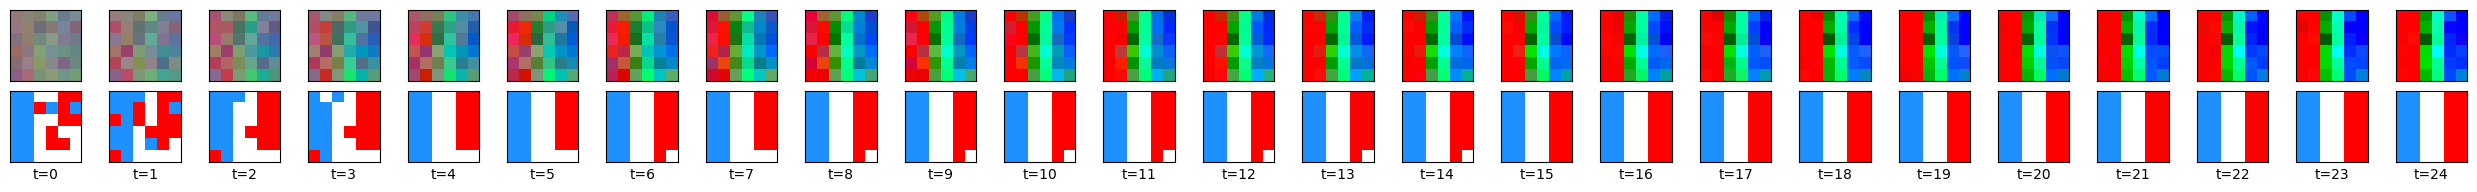

In [185]:
def plot_states(data, episode=0, n_type=3, bounds=3, palette=["dodgerblue", "white", "red"]):
    states = data[episode]["state"][..., :n_type]
    print("cell types-channel shape:", states.shape)

    # bring to interval [0, 1], states have bounds (-bounds, bounds), see configs/flags.yml
    states = (states + bounds) / (2 * bounds)
    types = np.argmax(states[..., :n_type], axis=-1)  # define cell type as argmax of cell-state vector (states[..., 3:] are hidden states)
    print("cell-type shape (argmax of types-channel):", types.shape)
    
    fig, axes = plt.subplots(2, len(states), sharex=True, sharey=True, figsize=(25,2))
    for i, (s, t, ax_rbg, ax_palette) in enumerate(zip(states, types, axes[0], axes[1])):   
        ax_rbg.imshow(s.transpose(1, 0, 2))  # plot types of cell states in RGB    
        ax_palette.imshow(t.T, cmap=colors.ListedColormap(palette), vmin=0, vmax=2)  # use color-palette
        ax_palette.set_xlabel(f"t={i}")

    axes[0, 0].invert_yaxis()
    plt.xticks([]), plt.yticks([])
    plt.tight_layout()

    return fig, axes
    
plot_states(test_data, episode=0);

#### Plot Hidden-States across Developmet from `test_data`

hidden shape: (25, 6, 6, 1)


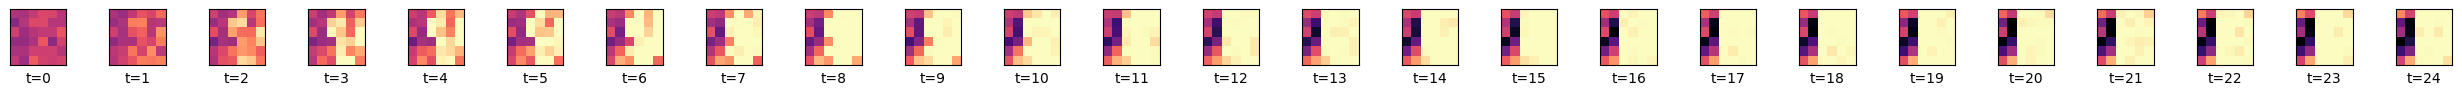

In [186]:
def plot_hidden(data, episode=0, n_type=3, bounds=3, cmap="magma"):
    hidden = data[episode]["state"][..., n_type:]
    print("hidden shape:", hidden.shape)

    n_time = hidden.shape[0]
    n_hidden = hidden.shape[-1]
    
    fig, axes = plt.subplots(n_hidden, n_time, sharex=True, sharey=True, figsize=(n_time, n_hidden))
    axes = np.atleast_2d(axes)  # is single hidden state -> add another one
    for h_channel, h_axes in zip(hidden.transpose(3, 0, 1, 2), axes):  # iterate over hidden channels (dim=2 in hidden array)    
        for h_t, ax_t in zip(h_channel, h_axes):   
            ax_t.imshow(h_t.transpose(1, 0), vmin=-bounds, vmax=bounds, cmap=cmap)  # plot hidden cell states

    for t, ax in enumerate(axes[-1]):
        ax.set_xlabel(f"t={t}")

    axes[0, 0].invert_yaxis()
    plt.xticks([]), plt.yticks([])
    plt.tight_layout()

    return fig, axes

plot_hidden(test_data, episode=0);  